In [ ]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__


'2.8.2'

In [ ]:
! unzip dataset.zip

**Data Preprocessing**

Here we augment the data (images) with Keras.
ImageDataGenerator helps us to  rotate or augment the data in the real time while training the data

In [ ]:

# Part 1 - Data Preprocessing

# Preprocessing the Training set

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


**Building the CNN**

In this part, we build the convolution neural network with keras.
At every layer relu activation is used except in the output layer. There we have used Sigmoid activation since we have 2 class classification.

In [ ]:

# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 100)


Epoch 1/100
250/250 [==============================] - 67s 267ms/step - loss: 0.6009 - accuracy: 0.6791 - val_loss: 0.5464 - val_accuracy: 0.7310
Epoch 2/100
250/250 [==============================] - 67s 266ms/step - loss: 0.5538 - accuracy: 0.7165 - val_loss: 0.5170 - val_accuracy: 0.7350
Epoch 3/100
250/250 [==============================] - 67s 266ms/step - loss: 0.5187 - accuracy: 0.7409 - val_loss: 0.5702 - val_accuracy: 0.6915
Epoch 4/100
250/250 [==============================] - 67s 266ms/step - loss: 0.5089 - accuracy: 0.7498 - val_loss: 0.4861 - val_accuracy: 0.7660
Epoch 5/100
250/250 [==============================] - 67s 267ms/step - loss: 0.4780 - accuracy: 0.7696 - val_loss: 0.4739 - val_accuracy: 0.7810
Epoch 6/100
250/250 [==============================] - 66s 265ms/step - loss: 0.4661 - accuracy: 0.7753 - val_loss: 0.5278 - val_accuracy: 0.7530
Epoch 7/100
250/250 [==============================] - 66s 266ms/step - loss: 0.4473 - accuracy: 0.7893 - val_loss: 0.4833 -

**Prediction**


**Dog**

Populating the interactive namespace from numpy and matplotlib


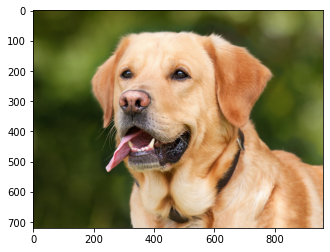

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('dataset/single_prediction/cat_or_dog_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


**Cat**

Populating the interactive namespace from numpy and matplotlib


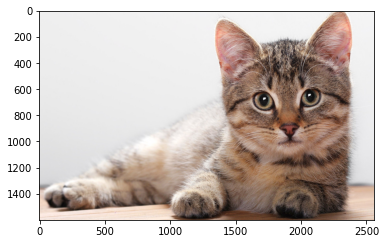

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('dataset/single_prediction/cat_or_dog_2.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

cat
